In [1]:
#importing
import pickle
import random
import numpy as np
from timeit import default_timer as dt
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
from celluloid import Camera
from IPython.display import HTML
from matplotlib import colors
%store -r


np.random.seed(0)

In [2]:
#--defining functions

#---Total molecules
def totmol():

    return (count1 + count2 + count3 + count4 + count12 + count3411 + count3412 + count342)


def dist(a,b):
#ab and xy should be mapped properly
    xx0 = (150-b)*(10**-9)
    yy0 = (150-a)*(10**-9)

    return (z0+Rb-((Rb**2-((xx0)**2+(yy0)**2))**.5))


def diffuse(a,b,m):

    drxn = random.randint(1,4)
#	drxn = 1

    if drxn == 1:#up
        if a != 0:#boundary

            if m == 0:
                #cell
                if surf[a][b][0][1] == 1:
                    #LFA
                    if surf[a-1][b][0] == 0:
                        #empty
                        surf[a-1][b][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        pos.remove((a,b,0))
                        pos.append((a-1,b,0))


                elif surf[a][b][0][1] == 3:
                    #BCR
                    if surf[a][b][0][4] == 0:
                        #Horizontal
                        if surf[a-1][b][0] == 0 and surf[a-1][b+1][0] == 0 and surf[a-1][b+2][0] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a-1][b+1][0] = surf[a][b+1][0]
                            surf[a-1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))

                    else:
                        #Vertical
                        if surf[a-1][b][0] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))


                elif surf[a][b][0][1] == 3411:
                    #BA1(1)
                        #Horizontal
                    if surf[a][b][0][4] == 0:
                        if surf[a-1][b][0] == 0 and surf[a-1][b+1][0] == 0 and surf[a-1][b+2][0] == 0 and surf[a-1][b][1] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a-1][b+1][0] = surf[a][b+1][0]
                            surf[a-1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            #Ag part
                            surf[a-1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))

                    else:
                        #Vertical
                        if surf[a-1][b][0] == 0 and surf[a-1][b][1] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = 0
                            #Ag part
                            surf[a-1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))


                elif surf[a][b][0][1] == 3412:
                    #BA1(2)
                        #Horizontal
                    if surf[a][b][0][4] == 0:
                        if surf[a-1][b][0] == 0 and surf[a-1][b+1][0] == 0 and surf[a-1][b+2][0] == 0 and surf[a-1][b+2][1] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a-1][b+1][0] = surf[a][b+1][0]
                            surf[a-1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            #Ag part
                            surf[a-1][b+2][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))

                    else:
                        #Vertical
                        if surf[a-1][b][0] == 0 and surf[a+1][b][1] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = 0
                            #Ag part
                            surf[a+1][b][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))


                elif surf[a][b][0][1] == 342:
                    #BA2
                        #Horizontal
                    if surf[a][b][0][4] == 0:
                        if surf[a-1][b][0] == 0 and surf[a-1][b+1][0] == 0 and surf[a-1][b+2][0] == 0 and surf[a-1][b][1] == 0 and surf[a-1][b+2][1] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a-1][b+1][0] = surf[a][b+1][0]
                            surf[a-1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            #Ag part
                            surf[a-1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            surf[a-1][b+2][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))


                    else:
                        #Vertical
                        if surf[a-1][b][0] == 0 and surf[a-1][b][1] == 0 and surf[a+1][b][1] == 0:
                            #empty
                            surf[a-1][b][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = 0
                            #Ag part
                            surf[a-1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            surf[a+1][b][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a-1,b,0))


                elif surf[a][b][0][1] == 12:

                    if surf[a-1][b][0] == 0 and surf[a-1][b][1] == 0:
                        #empty
                        surf[a-1][b][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        #ICAM part
                        surf[a-1][b][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,0))
                        pos.append((a-1,b,0))

            elif m == 1:
                #layer

                if surf[a][b][1][1] == 2:
                    #ICAM
                    if surf[a-1][b][1] == 0:
                        #empty
                        surf[a-1][b][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a-1,b,1))


                elif surf[a][b][1][1] == 4:
                    #Ag
                    if surf[a-1][b][1] == 0:
                        #empty
                        surf[a-1][b][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a-1,b,1))


    elif drxn == 2:#right
        if b != 299:#boundary

            if m == 0:
                #cell
                if surf[a][b][0][1] == 1:
                    #LFA
                    if surf[a][b+1][0] == 0:
                        #empty
                        surf[a][b+1][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        pos.remove((a,b,0))
                        pos.append((a,b+1,0))


                elif surf[a][b][0][1] == 3:
                    #BCR
                    if surf[a][b][0][4] == 0 and b != 297:#boundary
                        #Horizontal
                        if surf[a][b+3][0] == 0:
                            #empty
                            surf[a][b+3][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))


                    else:
                        #Vertical
                        if surf[a][b+1][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+2][b+1][0] == 0:
                            #empty
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a+1][b][0]
                            surf[a+2][b+1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))



                elif surf[a][b][0][1] == 3411:
                    #BA1(1)
                    if surf[a][b][0][4] == 0 and b != 297:#boundary
                        #Horizontal
                        if surf[a][b+3][0] == 0 and surf[a][b+1][1] == 0:
                            #empty
                            surf[a][b+3][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            #Ag
                            surf[a][b+1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))


                    else:
                        #Vertical
                        if surf[a][b+1][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+2][b+1][0] == 0 and surf[a][b+1][1] == 0:
                            #empty
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a+1][b][0]
                            surf[a+2][b+1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            #Ag
                            surf[a][b+1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))



                elif surf[a][b][0][1] == 3412:
                    #BA1(2)
                        #Horizontal
                    if surf[a][b][0][4] == 0 and b != 297:#boundary
                        #Horizontal
                        if surf[a][b+3][0] == 0 and surf[a][b+3][1] == 0:
                            #empty
                            surf[a][b+3][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            #Ag
                            surf[a][b+3][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))


                    else:
                        #Vertical
                        if surf[a][b+1][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+2][b+1][0] == 0 and surf[a+2][b+1][1] == 0:
                            #empty
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a+1][b][0]
                            surf[a+2][b+1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            #Ag
                            surf[a+2][b+1][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))



                elif surf[a][b][0][1] == 342:
                    #BA2

                    if surf[a][b][0][4] == 0 and b != 297:#boundary
                        #Horizontal
                        if surf[a][b+3][0] == 0 and surf[a][b+3][1] == 0 and surf[a][b+1][1] == 0:
                            #empty
                            surf[a][b+3][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            #Ag
                            surf[a][b+3][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            surf[a][b+1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))


                    else:
                        #Vertical
                        if surf[a][b+1][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+2][b+1][0] == 0 and surf[a+2][b+1][1] == 0 and surf[a][b+1][1] == 0:
                            #empty
                            surf[a][b+1][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a+1][b][0]
                            surf[a+2][b+1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            #Ag
                            surf[a+2][b+1][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            surf[a][b+1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b+1,0))




                elif surf[a][b][0][1] == 12:

                    if surf[a][b+1][0] == 0 and surf[a][b+1][1] == 0:
                        #empty
                        surf[a][b+1][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        #ICAM part
                        surf[a][b+1][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,0))
                        pos.append((a,b+1,0))



            elif m == 1:
                #layer

                if surf[a][b][1][1] == 2:
                    #ICAM
                    if surf[a][b+1][1] == 0:
                        #empty
                        surf[a][b+1][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a,b+1,1))



                elif surf[a][b][1][1] == 4:
                    #Ag
                    if surf[a][b+1][1] == 0:
                        #empty
                        surf[a][b+1][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a,b+1,1))


    elif drxn == 3:#down

        if a != 299:#boundary

            if m == 0:
                #cell
                if surf[a][b][0][1] == 1:
                    #LFA
                    if surf[a+1][b][0] == 0:
                        #empty
                        surf[a+1][b][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        pos.remove((a,b,0))
                        pos.append((a+1,b,0))

                elif surf[a][b][0][1] == 3:
                    #BCR
                    if surf[a][b][0][4] == 1 and a != 297:#boundary
                        #Vertical
                        if surf[a+3][b][0] == 0:
                            #empty
                            surf[a+3][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))

                    else:
                        #Horizontal
                        if surf[a+1][b][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+1][b+2][0] == 0:
                            #empty
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a][b+1][0]
                            surf[a+1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))


                elif surf[a][b][0][1] == 3411:
                    #BA1(1)
                    if surf[a][b][0][4] == 1 and a != 297:#boundary
                        #Vertical
                        if surf[a+3][b][0] == 0 and surf[a+1][b][1] == 0:
                            #empty
                            surf[a+3][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            #Ag
                            surf[a+1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))

                    else:
                        #Horizontal
                        if surf[a+1][b][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+1][b+2][0] == 0 and surf[a+1][b][1] == 0:
                            #empty
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a][b+1][0]
                            surf[a+1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            #Ag
                            surf[a+1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))


                elif surf[a][b][0][1] == 3412:
                    #BA1(2)
                    if surf[a][b][0][4] == 1 and a != 297:#boundary
                        #Vertical
                        if surf[a+3][b][0] == 0 and surf[a+3][b][1] == 0:
                            #empty
                            surf[a+3][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            #Ag
                            surf[a+3][b][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))

                    else:
                        #Horizontal
                        if surf[a+1][b][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+1][b+2][0] == 0 and surf[a+1][b+2][1] == 0:
                            #empty
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a][b+1][0]
                            surf[a+1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            #Ag
                            surf[a+1][b+2][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))

                elif surf[a][b][0][1] == 342:
                    #BA2

                    if surf[a][b][0][4] == 1 and a != 297:#boundary
                        #Vertical
                        if surf[a+3][b][0] == 0 and surf[a+3][b][1] == 0 and surf[a+1][b][1] == 0:
                            #empty
                            surf[a+3][b][0] = surf[a+2][b][0]
                            surf[a+2][b][0] = surf[a+1][b][0]
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a][b][0] = 0
                            #Ag
                            surf[a+3][b][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            surf[a+1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))

                    else:
                        #Horizontal
                        if surf[a+1][b][0] == 0 and surf[a+1][b+1][0] == 0 and surf[a+1][b+2][0] == 0 and surf[a+1][b][1] == 0 and surf[a+1][b+2][1] == 0:
                            #empty
                            surf[a+1][b][0] = surf[a][b][0]
                            surf[a+1][b+1][0] = surf[a][b+1][0]
                            surf[a+1][b+2][0] = surf[a][b+2][0]
                            surf[a][b][0] = 0
                            surf[a][b+1][0] = 0
                            surf[a][b+2][0] = 0
                            #Ag
                            surf[a+1][b+2][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            surf[a+1][b][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a+1,b,0))


                elif surf[a][b][0][1] == 12:

                    if surf[a+1][b][0] == 0 and surf[a+1][b][1] == 0:
                        #empty
                        surf[a+1][b][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        #ICAM part
                        surf[a+1][b][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,0))
                        pos.append((a+1,b,0))


            elif m == 1:
                #layer

                if surf[a][b][1][1] == 2:
                    #ICAM
                    if surf[a+1][b][1] == 0:
                        #empty
                        surf[a+1][b][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a+1,b,1))


                elif surf[a][b][1][1] == 4:
                    #Ag
                    if surf[a+1][b][1] == 0:
                        #empty
                        surf[a+1][b][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a+1,b,1))

    else:#left

        if b != 0:#boundary

            if m == 0:
                #cell
                if surf[a][b][0][1] == 1:
                    #LFA
                    if surf[a][b-1][0] == 0:
                        #empty
                        surf[a][b-1][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        pos.remove((a,b,0))
                        pos.append((a,b-1,0))

                elif surf[a][b][0][1] == 3:
                    #BCR
                    if surf[a][b][0][4] == 0:#boundary
                        #Horizontal
                        if surf[a][b-1][0] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))

                    else:
                        #Vertical
                        if surf[a][b-1][0] == 0 and surf[a+1][b-1][0] == 0 and surf[a+2][b-1][0] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a+1][b-1][0] = surf[a+1][b][0]
                            surf[a+2][b-1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))

                elif surf[a][b][0][1] == 3411:
                    #BA1(1)
                    if surf[a][b][0][4] == 0:#boundary
                        #Horizontal
                        if surf[a][b-1][0] == 0 and surf[a][b-1][1] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = 0
                            #Ag
                            surf[a][b-1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))

                    else:
                        #Vertical
                        if surf[a][b-1][0] == 0 and surf[a+1][b-1][0] == 0 and surf[a+2][b-1][0] == 0 and surf[a][b-1][1] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a+1][b-1][0] = surf[a+1][b][0]
                            surf[a+2][b-1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            #Ag
                            surf[a][b-1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))


                elif surf[a][b][0][1] == 3412:
                    #BA1(2)

                    if surf[a][b][0][4] == 0:#boundary
                        #Horizontal
                        if surf[a][b-1][0] == 0 and surf[a][b+1][1] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = 0
                            #Ag
                            surf[a][b+1][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))

                    else:
                        #Vertical
                        if surf[a][b-1][0] == 0 and surf[a+1][b-1][0] == 0 and surf[a+2][b-1][0] == 0 and surf[a+2][b-1][1] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a+1][b-1][0] = surf[a+1][b][0]
                            surf[a+2][b-1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            #Ag
                            surf[a+2][b-1][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))


                elif surf[a][b][0][1] == 342:
                    #BA2

                    if surf[a][b][0][4] == 0:#boundary
                        #Horizontal
                        if surf[a][b-1][0] == 0 and surf[a][b-1][1] == 0 and surf[a][b+1][1] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a][b][0] = surf[a][b+1][0]
                            surf[a][b+1][0] = surf[a][b+2][0]
                            surf[a][b+2][0] = 0
                            #Ag
                            surf[a][b-1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            surf[a][b+1][1] = surf[a][b+2][1]
                            surf[a][b+2][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))

                    else:
                        #Vertical
                        if surf[a][b-1][0] == 0 and surf[a+1][b-1][0] == 0 and surf[a+2][b-1][0] == 0 and surf[a+2][b-1][1] == 0 and surf[a][b-1][1] == 0:
                            #empty
                            surf[a][b-1][0] = surf[a][b][0]
                            surf[a+1][b-1][0] = surf[a+1][b][0]
                            surf[a+2][b-1][0] = surf[a+2][b][0]
                            surf[a][b][0] = 0
                            surf[a+1][b][0] = 0
                            surf[a+2][b][0] = 0
                            #Ag
                            surf[a+2][b-1][1] = surf[a+2][b][1]
                            surf[a+2][b][1] = 0
                            surf[a][b-1][1] = surf[a][b][1]
                            surf[a][b][1] = 0
                            pos.remove((a,b,0))
                            pos.append((a,b-1,0))


                elif surf[a][b][0][1] == 12:

                    if surf[a][b-1][0] == 0 and surf[a][b-1][1] == 0:
                        #empty
                        surf[a][b-1][0] = surf[a][b][0]
                        surf[a][b][0] = 0
                        #ICAM part
                        surf[a][b-1][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,0))
                        pos.append((a,b-1,0))



            elif m == 1:
                #layer

                if surf[a][b][1][1] == 2:
                    #ICAM
                    if surf[a][b-1][1] == 0:
                        #empty
                        surf[a][b-1][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a,b-1,1))


                elif surf[a][b][1][1] == 4:
                    #Ag
                    if surf[a][b-1][1] == 0:
                        #empty
                        surf[a][b-1][1] = surf[a][b][1]
                        surf[a][b][1] = 0
                        pos.remove((a,b,1))
                        pos.append((a,b-1,1))

    return (None)




def rxn(a,b,m):

    global count1, count2, count3, count4, count12, count3411, count3412, count342

    rx = np.random.random()

    if surf[a][b][m][1] == 1 and rx <= p_on_LI(z_dist(a, b)):#LI

        if surf[a][b][1] != 0:
            if surf[a][b][1][1] == 2:

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),12,(a,b,0),1]
                surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),12,(a,b,1),2]
                pos.remove((a,b,1))
                count12 += 1
                count1 -= 1
                count2 -= 1


    elif surf[a][b][m][1] == 2 and rx <= p_on_LI(z_dist(a, b)):#LI

        if surf[a][b][0] != 0:
            if surf[a][b][0][1] == 1:

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),12,(a,b,0),1]
                surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),12,(a,b,1),2]
                pos.remove((a,b,1))
                count12 += 1
                count1 -= 1
                count2 -= 1

    elif surf[a][b][m][1] == 3 and rx <= p_on_BA(z_dist(a, b)):#BCR/Ag
        BCR_site = np.random.random()

        if surf[a][b][0][4] == 0:#Horizontal

            if BCR_site <= 0.5:#Head

                if surf[a][b][1] != 0:
                    if surf[a][b][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,0),0,0,3]
                        surf[a][b+1][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b+1,0),1,0,3]
                        surf[a][b+2][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b+2,0),2,0,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,1),4]

                        pos.remove((a,b,1))
                        count3411 += 1
                        count3 -= 1
                        count4 -= 1

            else:#Tail

                if surf[a][b+2][1] != 0:
                    if surf[a][b+2][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b+2][1][0]),3412,(a,b,0),0,0,3]
                        surf[a][b+1][0] = [(name1)*(10000)+(surf[a][b+2][1][0]),3412,(a,b+1,0),1,0,3]
                        surf[a][b+2][0] = [(name1)*(10000)+(surf[a][b+2][1][0]),3412,(a,b+2,0),2,0,3]
                        surf[a][b+2][1] = [(name1)*(10000)+(surf[a][b+2][1][0]),3412,(a,b,1),4]

                        pos.remove((a,b+2,1))
                        count3412 += 1
                        count3 -= 1
                        count4 -= 1


        else:#Vertical

            if BCR_site <= 0.5:#Head

                if surf[a][b][1] != 0:
                    if surf[a][b][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,0),0,1,3]
                        surf[a+1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a+1,b,0),1,1,3]
                        surf[a+2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a+2,b,0),2,1,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,1),4]

                        pos.remove((a,b,1))
                        count3411 += 1
                        count3 -= 1
                        count4 -= 1

            else:#Tail

                if surf[a+2][b][1] != 0:
                    if surf[a+2][b][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a+2][b][1][0]),3412,(a,b,0),0,1,3]
                        surf[a+1][b][0] = [(name1)*(10000)+(surf[a+2][b][1][0]),3412,(a+1,b,0),1,1,3]
                        surf[a+2][b][0] = [(name1)*(10000)+(surf[a+2][b][1][0]),3412,(a+2,b,0),2,1,3]
                        surf[a+2][b][1] = [(name1)*(10000)+(surf[a+2][b][1][0]),3412,(a,b,1),4]

                        pos.remove((a+2,b,1))
                        count3412 += 1
                        count3 -= 1
                        count4 -= 1


    elif surf[a][b][m][1] == 4 and rx <= p_on_BA(z_dist(a, b)):#BCR/Ag

        if surf[a][b][0] != 0:

            if surf[a][b][0][1] == 3:

                if surf[a][b][0][4] == 0:#Horizontal

                    if surf[a][b][0][3] == 0:#Head

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,0),0,0,3]
                        surf[a][b+1][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b+1,0),1,0,3]
                        surf[a][b+2][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b+2,0),2,0,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,1),4]

                        pos.remove((a,b,1))
                        count3411 += 1
                        count3 -= 1
                        count4 -= 1

                    elif surf[a][b][0][3] == 2:#Tail

                        name1 = surf[a][b][0][0]

                        surf[a][b-2][0] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a,b-2,0),0,0,3]
                        surf[a][b-1][0] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a,b-1,0),1,0,3]
                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a,b,0),2,0,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a,b,1),4]

                        pos.remove((a,b,1))
                        count3412 += 1
                        count3 -= 1
                        count4 -= 1


                else:#Vertical

                    if surf[a][b][0][3] == 0:#Head

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,0),0,1,3]
                        surf[a+1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a+1,b,0),1,1,3]
                        surf[a+2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a+2,b,0),2,1,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),3411,(a,b,1),4]

                        pos.remove((a,b,1))
                        count3411 += 1
                        count3 -= 1
                        count4 -= 1

                    elif surf[a][b][0][3] == 2:#Tail

                        name1 = surf[a][b][0][0]

                        surf[a-2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a-2,b,0),0,1,3]
                        surf[a-1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a-1,b,0),1,1,3]
                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a,b,0),2,1,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),3412,(a,b,1),4]

                        pos.remove((a,b,1))
                        count3412 += 1
                        count3 -= 1
                        count4 -= 1


            elif surf[a][b][0][1] == 3411 and surf[a][b][0][3] == 2:

                if surf[a][b][0][4] == 0:#Horizontal

                    name1 = surf[a][b-2][0][0]

                    surf[a][b-2][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b-2,0),0,0,3]
                    surf[a][b-1][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b-1,0),1,0,3]
                    surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),2,0,3]
                    surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,1),4]

                    pos.remove((a,b,1))
                    count342 += 1
                    count3411 -= 1
                    count4 -= 1

                else:#Vertical

                    name1 = surf[a-2][b][0][0]

                    surf[a-2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a-2,b,0),0,1,3]
                    surf[a-1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a-1,b,0),1,1,3]
                    surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),2,1,3]
                    surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,1),4]

                    pos.remove((a,b,1))
                    count342 += 1
                    count3411 -= 1
                    count4 -= 1



            elif surf[a][b][0][1] == 3412 and surf[a][b][0][3] == 0:

                if surf[a][b][0][4] == 0:#Horizontal

                    name1 = surf[a][b][0][0]

                    surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),0,0,3]
                    surf[a][b+1][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+1,0),1,0,3]
                    surf[a][b+2][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+2,0),2,0,3]
                    surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,1),4]

                    pos.remove((a,b,1))
                    count342 += 1
                    count3412 -= 1
                    count4 -= 1

                else:#Vertical

                    name1 = surf[a][b][0][0]

                    surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),0,1,3]
                    surf[a+1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+1,b,0),1,1,3]
                    surf[a+2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+2,b,0),2,1,3]
                    surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,1),4]

                    pos.remove((a,b,1))
                    count342 += 1
                    count3412 -= 1
                    count4 -= 1


    elif surf[a][b][m][1] == 12 and rx <= p_off_LI(z_dist(a, b)):#L+I

        surf[a][b][0] = [surf[a][b][0][0]//10000,1,(a,b,0)]
        surf[a][b][1] = [surf[a][b][1][0]%10000,2,(a,b,1)]

        pos.append((a,b,1))
        count12 -= 1
        count1 += 1
        count2 += 1

    elif surf[a][b][m][1] == 3411:

        BCR_site = np.random.random()

        if BCR_site <= 0.5 and rx <= p_off_BA(z_dist(a, b)):#Dissociation at Head

            if surf[a][b][0][4] == 0:#Horizontal

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3,(a,b,0),0,0]
                surf[a][b+1][0] = [name1//10000,3,(a,b+1,0),1,0]
                surf[a][b+2][0] = [name1//10000,3,(a,b+2,0),2,0]
                surf[a][b][1] = [surf[a][b][1][0]%10000,4,(a,b,1)]

                pos.append((a,b,1))
                count3411 -= 1
                count3 += 1
                count4 += 1

            else:#Vertical

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3,(a,b,0),0,1]
                surf[a+1][b][0] = [name1//10000,3,(a+1,b,0),1,1]
                surf[a+2][b][0] = [name1//10000,3,(a+2,b,0),2,1]
                surf[a][b][1] = [surf[a][b][1][0]%10000,4,(a,b,1)]

                pos.append((a,b,1))
                count3411 -= 1
                count3 += 1
                count4 += 1


        elif BCR_site > 0.5 and rx <= p_on_BA(z_dist(a, b)):#Association at Tail

            if surf[a][b][0][4] == 0:#Horizontal

                if surf[a][b+2][1] != 0:

                    if surf[a][b+2][1][1] == 4:

                        name1 = surf[a][b][0][0]	

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),0,0,3]
                        surf[a][b+1][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+1,0),1,0,3]
                        surf[a][b+2][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+2,0),2,0,3]
                        surf[a][b+2][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+2,1),4]

                        pos.remove((a,b+2,1))
                        count342 += 1
                        count3411 -= 1
                        count4 -= 1

            else:#Vertical

                if surf[a+2][b][1] != 0:

                    if surf[a+2][b][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),0,1,3]
                        surf[a+1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+1,b,0),1,1,3]
                        surf[a+2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+2,b,0),2,1,3]
                        surf[a+2][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+2,b,1),4]

                        pos.remove((a+2,b,1))
                        count342 += 1
                        count3411 -= 1
                        count4 -= 1

    elif surf[a][b][m][1] == 3412:

        BCR_site = np.random.random()

        if BCR_site <= 0.5 and rx <= p_off_BA(z_dist(a, b)):#Dissociation at Tail

            if surf[a][b][0][4] == 0:#Horizontal

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3,(a,b,0),0,0]
                surf[a][b+1][0] = [name1//10000,3,(a,b+1,0),1,0]
                surf[a][b+2][0] = [name1//10000,3,(a,b+2,0),2,0]
                surf[a][b+2][1] = [surf[a][b+2][1][0]%10000,4,(a,b+2,1)]

                pos.append((a,b+2,1))
                count3412 -= 1
                count3 += 1
                count4 += 1


            else:#Vertical

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3,(a,b,0),0,1]
                surf[a+1][b][0] = [name1//10000,3,(a+1,b,0),1,1]
                surf[a+2][b][0] = [name1//10000,3,(a+2,b,0),2,1]
                surf[a+2][b][1] = [surf[a+2][b][1][0]%10000,4,(a+2,b,1)]

                pos.append((a+2,b,1))
                count3412 -= 1
                count3 += 1
                count4 += 1


        elif BCR_site > 0.5 and rx <= p_on_BA(z_dist(a, b)):#Association at Head

            if surf[a][b][0][4] == 0:#Horizontal

                if surf[a][b][1] != 0:

                    if surf[a][b][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),0,0,3]
                        surf[a][b+1][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+1,0),1,0,3]
                        surf[a][b+2][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b+2,0),2,0,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,1),4]

                        pos.remove((a,b,1))
                        count342 += 1
                        count3412 -= 1
                        count4 -= 1

            else:#Vertical

                if surf[a][b][1] != 0:

                    if surf[a][b][1][1] == 4:

                        name1 = surf[a][b][0][0]

                        surf[a][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,0),0,1,3]
                        surf[a+1][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+1,b,0),1,1,3]
                        surf[a+2][b][0] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a+2,b,0),2,1,3]
                        surf[a][b][1] = [(name1)*(10000)+(surf[a][b][1][0]),342,(a,b,1),4]

                        pos.remove((a,b,1))
                        count342 += 1
                        count3412 -= 1
                        count4 -= 1


    elif surf[a][b][m][1] == 342 and rx <= p_off_BA(z_dist(a, b)):#BCR/Ag + Ag

        BCR_site = np.random.random()

        if BCR_site <= 0.5:#Dissociation at Head

            if surf[a][b][0][4] == 0:#Horizontal

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3412,(a,b,0),0,0]
                surf[a][b+1][0] = [name1//10000,3412,(a,b+1,0),1,0]
                surf[a][b+2][0] = [name1//10000,3412,(a,b+2,0),2,0]
                surf[a][b][1] = [surf[a][b][1][0]%10000,4,(a,b,1)]

                pos.append((a,b,1))
                count342 -= 1
                count3412 += 1
                count4 += 1

            else:#Vertical

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3412,(a,b,0),0,1]
                surf[a+1][b][0] = [name1//10000,3412,(a+1,b,0),1,1]
                surf[a+2][b][0] = [name1//10000,3412,(a+2,b,0),2,1]
                surf[a][b][1] = [surf[a][b][1][0]%10000,4,(a,b,1)]

                pos.append((a,b,1))
                count342 -= 1
                count3412 += 1
                count4 += 1

        else:#Dissociation at Tail

            if surf[a][b][0][4] == 0:#Horizontal

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3411,(a,b,0),0,0]
                surf[a][b+1][0] = [name1//10000,3411,(a,b+1,0),1,0]
                surf[a][b+2][0] = [name1//10000,3411,(a,b+2,0),2,0]
                surf[a][b+2][1] = [surf[a][b+2][1][0]%10000,4,(a,b+2,1)]

                pos.append((a,b+2,1))
                count342 -= 1
                count3411 += 1
                count4 += 1

            else:#Vertical

                name1 = surf[a][b][0][0]

                surf[a][b][0] = [name1//10000,3411,(a,b,0),0,1]
                surf[a+1][b][0] = [name1//10000,3411,(a+1,b,0),1,1]
                surf[a+2][b][0] = [name1//10000,3411,(a+2,b,0),2,1]
                surf[a+2][b][1] = [surf[a+2][b][1][0]%10000,4,(a+2,b,1)]

                pos.append((a+2,b,1))
                count342 -= 1
                count3411 += 1
                count4 += 1

    return (None)


In [3]:
def p_on_LI(z):
        
    return pmx_on_LI * np.exp(-(beta*k_LI*(z - z_eq_LI)**2)/2)

def p_on_BA(z):
        
    return pmx_on_BA * np.exp(-(beta*k_BA*(z - z_eq_BA)**2)/2)

def p_off_LI(z):
        
    return pmn_off_LI * np.exp((beta*k_LI*(z - z_eq_LI)**2)/2)

def p_off_BA(z):
        
    return pmn_off_BA * np.exp((beta*k_BA*(z - z_eq_BA)**2)/2)


def z_dist(a,b):#Height distance function

    xx0 = (150-b)*(10**-9)
    yy0 = (150-a)*(10**-9)
#ab and xy should be mapped properly
    return (z0+Rb-((Rb**2-((xx0)**2+(yy0)**2))**.5))


#--objective measure of synapse formation by mean radial distance from the centre

def rad_dist(a,b):

    xx0 = (150-b)*(10**-9)
    yy0 = (150-a)*(10**-9)

    return(((xx0)**2+(yy0)**2)**.5)


def Synform_LI():

    dist = []
    for i in pos:
        if surf[i[0]][i[1]][i[2]][1] == 12:
            dist.append(rad_dist(i[0],i[1]))

    if len(dist) == 0:
        return (0)

    else:
        return (np.mean(dist), np.std(dist))


def Synform_BA():#for BA and BA2

    dist = []
    for i in pos:
        if surf[i[0]][i[1]][i[2]][1] == 3411 or surf[i[0]][i[1]][i[2]][1] == 3412 or surf[i[0]][i[1]][i[2]][1] == 342:
            dist.append(rad_dist(i[0],i[1]))

    if len(dist) == 0:
        return (0)

    else:
        return (np.mean(dist), np.std(dist))
    
def conv_2_matrix(obj, bodies=[0, 1]):
    
    matrix = np.zeros(obj.shape, dtype=int)
    
    for body in bodies:
        for i in range(obj.shape[0]):
            for j in range(obj.shape[1]):
        
                v = obj[i, j, body]
            
                if v != 0:
                    
                    matrix[i, j, body] = v[1]
                    
    return matrix[:,:,0], matrix[:,:,1]

In [4]:
#To show full matrix
"""np.set_printoptions(threshold=np.inf)"""


#timer_start
#start = timeit.default_timer()


#index

"""
Free molecules

LFA = 1
ICAM = 2
BCR = 3
Ag = 4


Complex

LFA/ICAM = 12
BCR/Ag = 3411 or 3412 depending on where Ag is
BCR/Ag2 = 342

for BCR molecules

[id,3,position,H/M/T,orientation]

for complex
[id,12/3411/3412/342,position,H/M/T,orientation,free state(1,2,3,4,3411,3412)]


position

Head = 0
Mid = 1
Tail = 2

orientation

Horizontal = 0
Vertical = 1


Surface/Matrix
cell = 0
layer = 1

Direction

up = 1
right = 2
down = 3
left = 4


"""

##parameters

pdiff_cplex = (.1*.01)**.5 #0.1, 0.01, 0.001
pdiff_free = 1
#p_on_LI = 1
#p_off_LI = 0
#p_on_BA = 1
#p_off_BA = 0

T = 300
kb = 1.38e-23
beta = 1/(kb*T)

z0 = 40*(10**-9)
Rb = 6*(10**-6)

z_eq_LI = 42*(10**-9)
z_eq_BA = 40*(10**-9)

pmx_on_LI = .1 #fixed
pmn_off_LI = 1e-4 #fixed
pmx_on_BA = .1 #fixed
pmn_off_BA = 1e-4 #1e-3 to 1e-8

k_LI = 40e-6
k_BA = 40e-6


#--initial number of molecules and empty space (update: how is that empty, isn't that total)
initial1 = 3000
initial2 = 2000
initial3 = 3000
initial4 = 1000
empty = 90000



In [5]:
##initial setup

#--tags for naming; setting to 1

tag1 = 1001
tag2 = 1001
tag3 = 1001
tag4 = 1001

#--position table

pos = [] #the coords in the list has only head of molecules, so all the coords not in list are not null


#--preparing the initial B-cell and the lipid bilayer

surf = np.zeros((300,300,2),dtype = object)

while tag1 != 4001 or tag2 != 3001 or tag3 != 4001 or tag4 != 2001:


    xc = random.randint(0,299)
    yc = random.randint(0,299)
    pc = np.random.random()


    if surf[xc][yc][0] == 0:

        #LFA
        if pc <= ((initial1-tag1+1001)/(empty-tag1-tag3+2002)):
            surf[xc][yc][0] = [tag1,1,(xc,yc,0)]
            pos.append((xc,yc,0))
            tag1 += 1

        #BCR
        elif (initial1-tag1+1001)/(empty-tag1-tag3+2002) < pc <= (initial1+initial3-tag1-tag3+2002)/(empty-tag1-tag3+2002):

            #orientation
            orientation = np.random.random()

            #Horizontal
            if orientation < 0.5 and yc <= 297 and surf[xc][yc+1][0] == 0 and surf[xc][yc+2][0] == 0:
                surf[xc][yc][0] = [tag3,3,(xc,yc,0),0,0]
                surf[xc][yc+1][0] = [tag3,3,(xc,yc+1,0),1,0]
                surf[xc][yc+2][0] = [tag3,3,(xc,yc+2,0),2,0]
                pos.append((xc,yc,0))
                tag3 += 1

            #Vertical
            elif orientation >= 0.5 and xc <= 297 and surf[xc+1][yc][0] == 0 and surf[xc+2][yc][0] == 0:
                surf[xc][yc][0] = [tag3,3,(xc,yc,0),0,1]
                surf[xc+1][yc][0] = [tag3,3,(xc+1,yc,0),1,1]
                surf[xc+2][yc][0] = [tag3,3,(xc+2,yc,0),2,1]
                pos.append((xc,yc,0))
                tag3 += 1


    xl = random.randint(0,299)
    yl = random.randint(0,299)
    pl = np.random.random()


    if surf[xl][yl][1] == 0:

        #ICAM
        if pl <= ((initial2-tag2+1001)/(empty-tag2-tag4+2002)):
            surf[xl][yl][1] = [tag2,2,(xl,yl,1)]
            pos.append((xl,yl,1))
            tag2 += 1


        #Ag
        elif (initial2-tag2+1001)/(empty-tag2-tag4+2002) < pl <= (initial2+initial4-tag2-tag4+2002)/(empty-tag2-tag4+2002):
            surf[xl][yl][1] = [tag4,4,(xl,yl,1)]
            pos.append((xl,yl,1))
            tag4 += 1
            

In [6]:
#--setting molecule count

count1 = 3000
count2 = 2000
count3 = 3000
count4 = 1000

count12 = 0
count3411 = 0
count3412 = 0
count342 = 0

syn_BA = []
syn_LI = []

time_evolution = []

In [7]:
##simulation

#stopwatch
#clock = dt()

os.system('mkdir run')


#time_steps = 10**5
time_steps = 50 #increase time steps


for step in range(time_steps):

    trials = totmol()

    for trial in range(trials):

        #choosing random molecule
        molec = random.choice(pos)
        r_or_d = np.random.random()

        if r_or_d <= 0.5:

            #diffusion
            diffu = np.random.random()

            if surf[molec[0]][molec[1]][molec[2]][1] == 1 or surf[molec[0]][molec[1]][molec[2]][1] == 2 or surf[molec[0]][molec[1]][molec[2]][1] == 3 or surf[molec[0]][molec[1]][molec[2]][1] == 4:

                if diffu <= pdiff_free:
                    diffuse(molec[0],molec[1],molec[2])


            elif surf[molec[0]][molec[1]][molec[2]][1] == 12 or surf[molec[0]][molec[1]][molec[2]][1] == 3411 or surf[molec[0]][molec[1]][molec[2]][1] == 3412 or surf[molec[0]][molec[1]][molec[2]][1] == 342:

                if diffu <= pdiff_cplex:
                    diffuse(molec[0],molec[1],molec[2])


        else:
            #reaction
            rxn(molec[0],molec[1],molec[2])


    print (step + 1, end=" ")
#    print(round(dt()-clock,2))
#    clock = dt()

    time_evolution.append(conv_2_matrix(surf)[0])
    
    if step % 50 == 1:
        
        with open('run/partial_data.pkl', 'wb') as var:

            pickle.dump(time_evolution, var)
        
        print(f'saved till {step + 1}')
    
    
#    syn_BA.append(synform_BA())
#    syn_LI.append(synform_LI())

#print(syn_BA, syn_LI)

with open('run/data.pkl', 'wb') as var:

    pickle.dump(time_evolution, var)



mkdir: cannot create directory ‘run’: File exists


1 2 saved till 2
3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [8]:
avg_LI, avg_BA, std_BA, std_LI = [], [], [], []
c = 0

for instance in time_evolution:
    
    dist_LI, dist_BA = [], []
    
    for i in range(300):
        for j in range(300):
            
            if instance[i][j] == 12:
                
                dist_LI.append(rad_dist(i, j))
                
            elif instance[i][j] > 300:
                
                dist_BA.append(rad_dist(i, j))
                
    avg_LI.append(np.mean(dist_LI))
    avg_BA.append(np.mean(dist_BA))
    std_LI.append(np.std(dist_LI))
    std_BA.append(np.std(dist_BA))

    print(c, end=" ")
    c += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

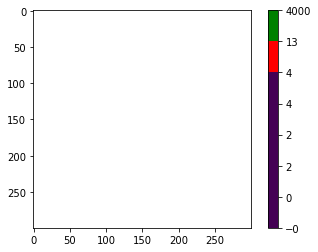

In [9]:
cmap = colors.ListedColormap(['#440154', '#440154', '#440154', '#440154', '#440154', 'red', 'green'])
#[0, LFA, ICAM, BCR, Ag, LI, BCR_Ag]
boundaries = [-.5, .5, 1.5, 2.5, 3.5, 4.5, 13, 4000]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

'''
with open('run/data.pkl', 'rb') as file:

    time_evolution = pickle.load(file)
'''

fig = plt.figure()
cam = Camera(fig)

for instance in time_evolution[:]:
    
    plt.imshow(instance, cmap=cmap, norm=norm)
    cam.snap()

cb = plt.colorbar()

anim = cam.animate()
#anim.save("run.mp4")
HTML(anim.to_html5_video())
